In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy

In [2]:
full_data = pd.read_parquet("Sleipner_4D_Seismic_Small.parquet.gzip", engine = "pyarrow")
# Calculate differences
full_data['01-94'] = full_data['01'] - full_data['94']
full_data['06-01'] = full_data['06'] - full_data['01']
full_data['06-94'] = full_data['06'] - full_data['94']

display(full_data)


,z,x,y,94,01,06,01-94,06-01,06-94
0,0.0,956,1716,0.000026,-0.006091,-0.005390,-0.006117,0.000700,-0.005417
1,0.0,956,1717,0.002181,-0.015860,0.009069,-0.018041,0.024929,0.006889
2,0.0,956,1718,0.000025,-0.009283,-0.006776,-0.009308,0.002507,-0.006801
3,0.0,956,1719,-0.003922,-0.009160,-0.004944,-0.005239,0.004216,-0.001022
4,0.0,956,1720,0.000031,-0.010252,-0.008233,-0.010283,0.002019,-0.008264
...,...,...,...,...,...,...,...,...,...
64241995,1498.0,1299,1960,-0.285229,-0.257875,-0.349266,0.027354,-0.091392,-0.064038
64241996,1498.0,1299,1961,-0.322909,-0.257242,-0.310981,0.065667,-0.053739,0.011928
64241997,1498.0,1299,1962,-0.232337,-0.178725,-0.181341,0.053612,-0.002616,0.050996
64241998,1498.0,1299,1963,-0.205845,-0.152657,-0.102178,0.053188,0.050479,0.103667


In [3]:
VOXEL_SIZE = 10
# Indexing the data to keep every 5th element in 'x', 'y', and 'z'
# Adjust the indexing to start from the first value of 'x', 'y', and 'z'
data = full_data[((full_data['x'] - full_data['x'].iloc[0]) % VOXEL_SIZE == 0) &
                         ((full_data['y'] - full_data['y'].iloc[0]) % VOXEL_SIZE == 0) &
                         ((full_data['z'] - full_data['z'].iloc[0]) % VOXEL_SIZE == 0)]

# Now indexed_data contains 1/125th of the original data
print("Original data shape:", full_data.shape)
print("Indexed data shape:", data.shape)

Original data shape: (64242000, 9)
Indexed data shape: (131250, 9)


Missing Values:
z        0
x        0
y        0
94       0
01       0
06       0
01-94    0
06-01    0
06-94    0
dtype: int64

Summary Statistics:
                  94             01             06
count  131250.000000  131250.000000  131250.000000
mean        0.001638       0.000101       0.000054
std         0.264822       0.261539       0.266144
min        -3.017591      -3.166698      -3.547440
25%        -0.111109      -0.112586      -0.117913
50%        -0.003592      -0.005591      -0.003331
75%         0.104130       0.107489       0.109092
max         2.316020       2.282607       2.357315


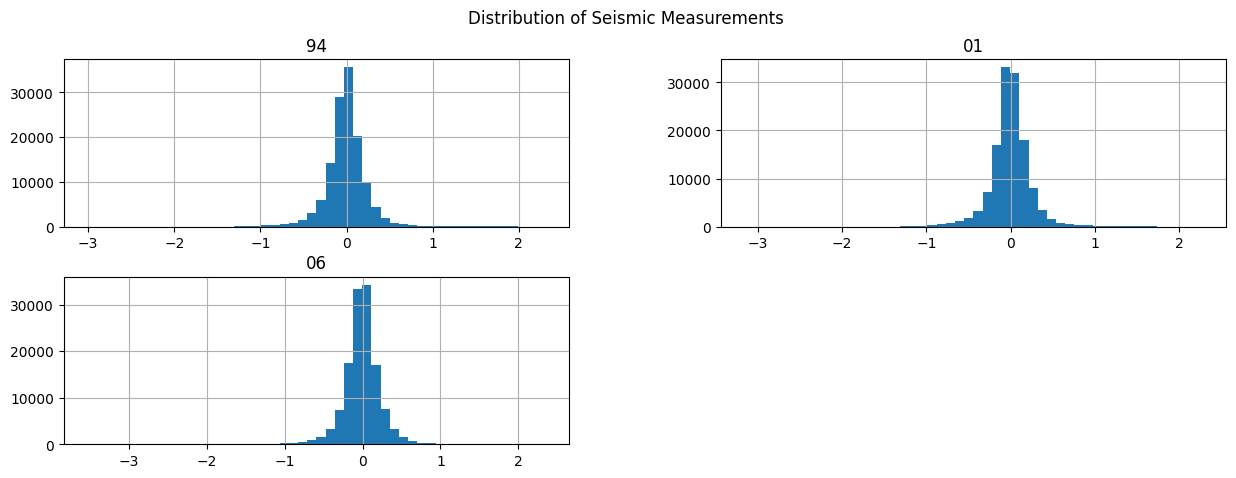

In [4]:
# Checking for missing values
print("Missing Values:")
print(data.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(data[['94', '01', '06']].describe())

# Histograms for the seismic measurement columns
data[['94', '01', '06']].hist(bins=50, figsize=(15, 5))
plt.suptitle('Distribution of Seismic Measurements')
plt.show()



Summary Statistics of Differences:
               01-94          06-01          06-94
count  131250.000000  131250.000000  131250.000000
mean       -0.001537      -0.000047      -0.001583
std         0.136285       0.168090       0.171153
min        -2.462196      -3.209064      -2.929834
25%        -0.072173      -0.079292      -0.081771
50%        -0.001805       0.001822      -0.000046
75%         0.070813       0.078079       0.078998
max         2.015957       2.466823       2.252499


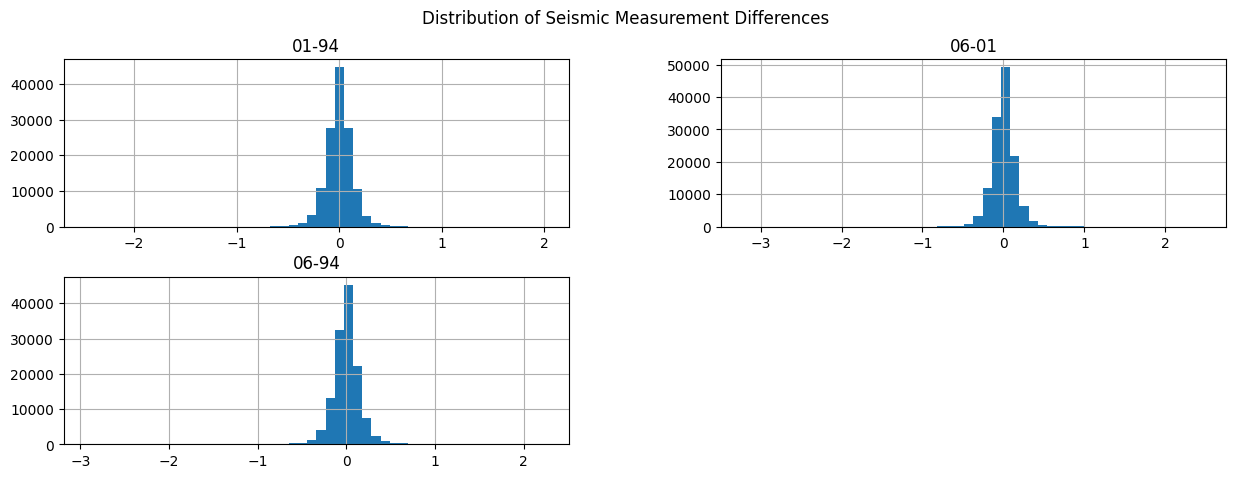

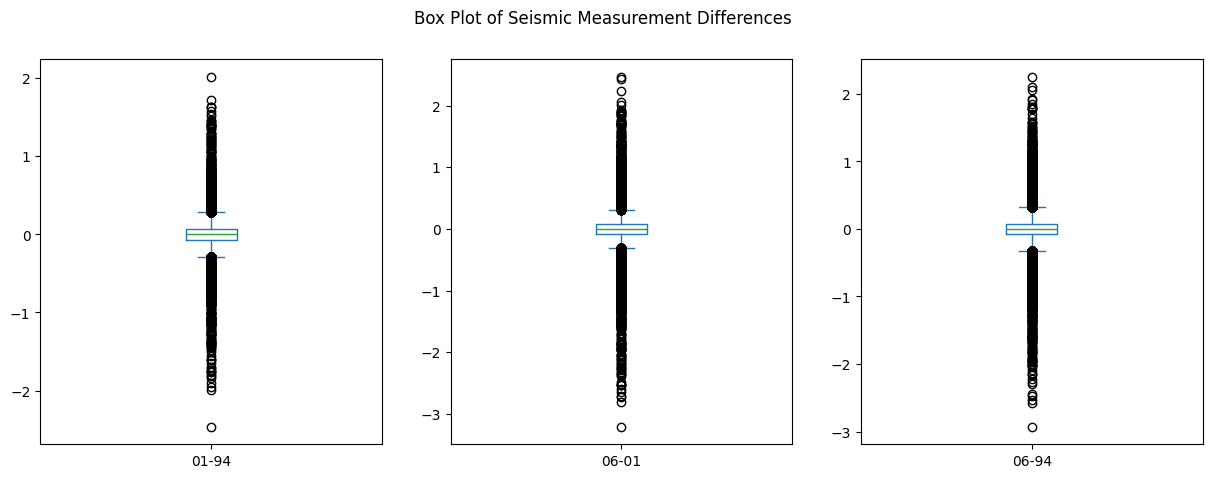

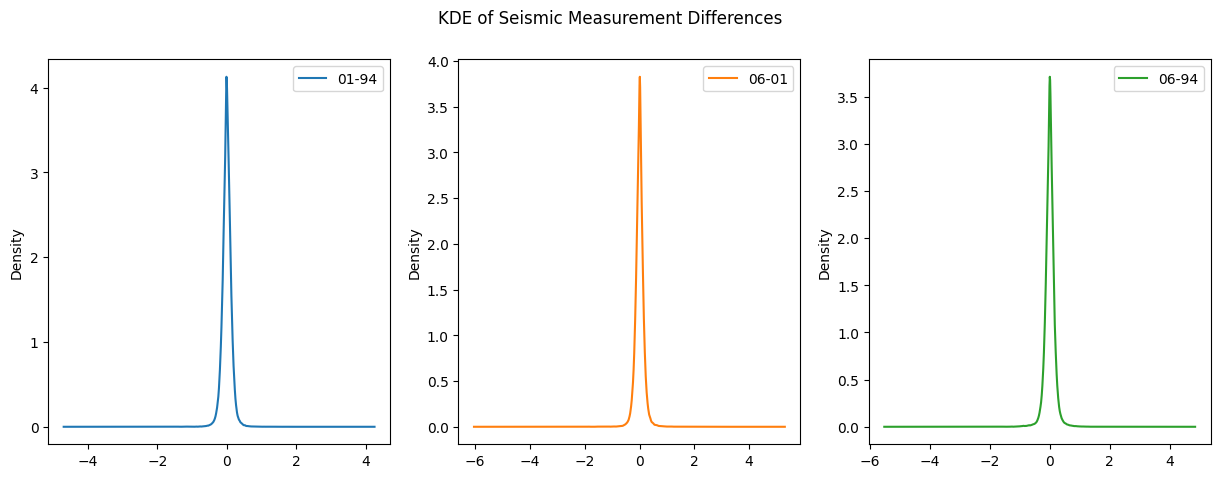

In [5]:
# Statistical summary of differences
print("\nSummary Statistics of Differences:")
print(data[['01-94', '06-01', '06-94']].describe())

# Histograms for the differences
data[['01-94', '06-01', '06-94']].hist(bins=50, figsize=(15, 5))
plt.suptitle('Distribution of Seismic Measurement Differences')
plt.show()

# Box plots for the differences
data[['01-94', '06-01', '06-94']].plot(kind='box', subplots=True, layout=(1, 3), sharex=False, figsize=(15, 5))
plt.suptitle('Box Plot of Seismic Measurement Differences')
plt.show()

# Kernel Density Estimate (KDE) plots for the differences
data[['01-94', '06-01', '06-94']].plot(kind='density', subplots=True, layout=(1, 3), sharex=False, figsize=(15, 5))
plt.suptitle('KDE of Seismic Measurement Differences')
plt.show()


In [30]:
# For example, using standard deviation as a threshold:
STD_TRESHOLD = 10
threshold = data[['01-94', '06-01', '06-94']].std() * STD_TRESHOLD  # Change 2 to your chosen number of standard deviations
# significant_changes = data[(data['01-94'].abs() > threshold['01-94']) |
#                            (data['06-01'].abs() > threshold['06-01']) |
#                            (data['06-94'].abs() > threshold['06-94'])]

significant_changes = data[(data['01-94'].abs() > threshold['01-94'])]
significant_changes = full_data[(full_data['01-94'].abs() > threshold['01-94'])]
significant_changes = significant_changes.drop(['94', '01', '06'], axis=1)

print("\nSignificant Changes (Based on Threshold):")
# print(significant_changes)


Significant Changes (Based on Threshold):


In [31]:
def show(data, const_axis, const_val, x_axis, y_axis, z_axis, colour="gray", z_min=-2, z_max=2, title=None):
    data = data.loc[data[const_axis] == const_val]
    data = data.pivot(columns=x_axis, index=y_axis, values=z_axis)
    fig, ax = plt.subplots()
    ax.imshow(data, cmap=colour, vmin=z_min, vmax=z_max)    

    plt.title(title)
    plt.tight_layout()
    return plt.show(fig)

# show(data, "y", 1846, "x", "z", "06", )

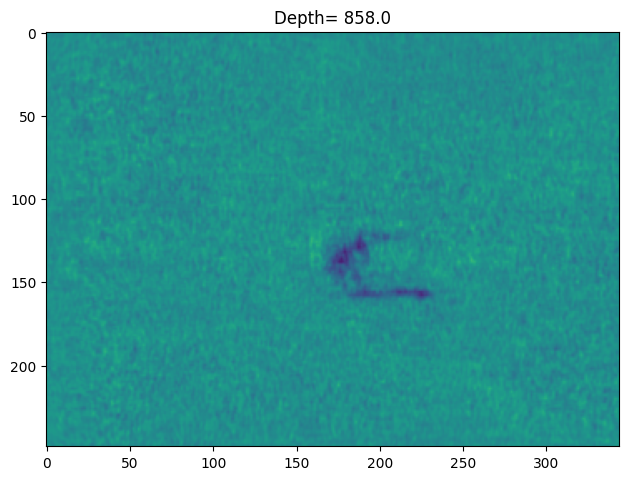

In [32]:
# Loop through each unique depth level and plot using the 'show' function
for depth in significant_changes['z'].unique()[:1]:
    show(data=full_data, 
         const_axis='z', 
         const_val=depth, 
         x_axis='x', 
         y_axis='y', 
         z_axis='01-94',  # Change in Seismic Measurement (01-94)
         colour='viridis',  # Color map
         title=f'Depth= {depth}')   # Maximum value for color scaling


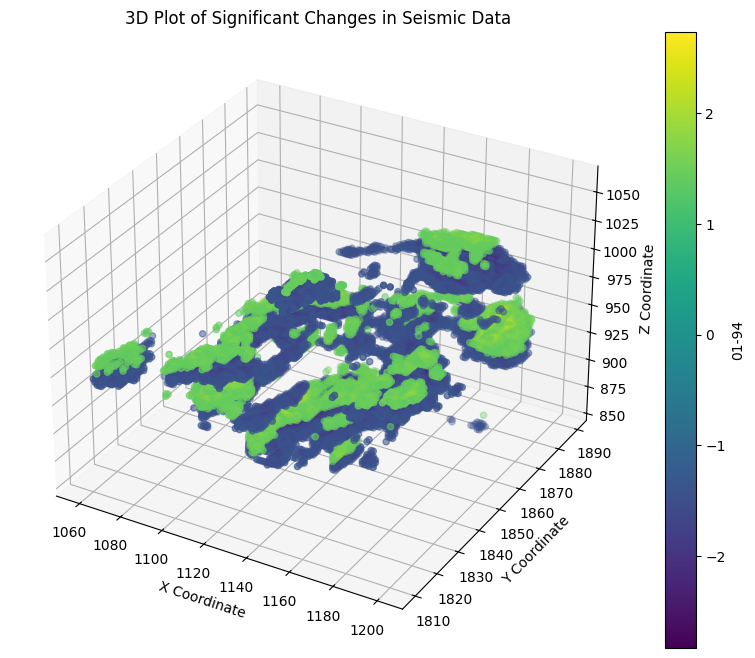

In [33]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for significant changes with color based on '01-94' feature
scatter = ax.scatter(significant_changes['x'], significant_changes['y'], significant_changes['z'], c=significant_changes['01-94'], cmap='viridis', marker='o')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')
plt.title('3D Plot of Significant Changes in Seismic Data')

# Adding a colorbar to interpret the '01-94' values
colorbar = fig.colorbar(scatter, ax=ax)
colorbar.set_label('01-94')

plt.show()


In [9]:
significant_changes.index.max(), full_data.index.max(), data.index.max()

(43308730, 64241999, 63898620)

/var/folders/5n/9wy5zl613y98x2_dmqjmf48r0000gp/T/ipykernel_35777/4092749846.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.labels_


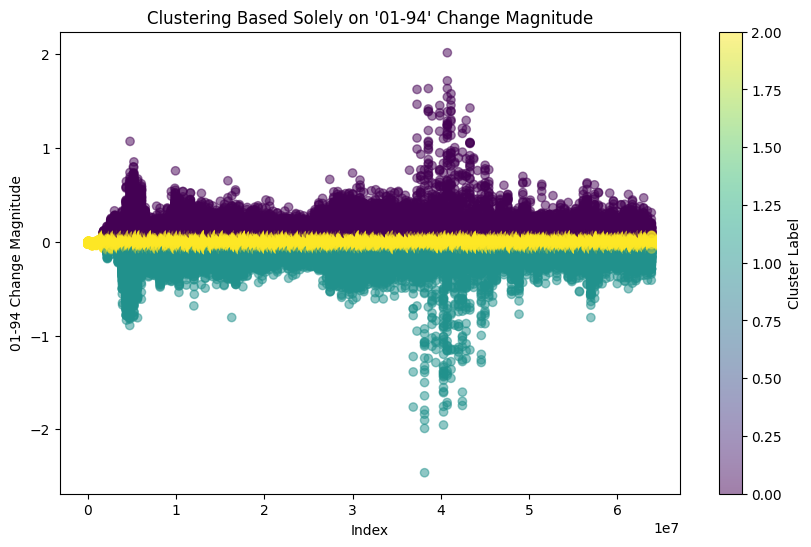

In [18]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Prepare the data for clustering
# This includes the spatial coordinates and the '01-94' changes as a feature for clustering
data_for_clustering = significant_changes[['01-94']].copy()

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_for_clustering)

# Assign the cluster labels back to the original DataFrame
data['cluster'] = kmeans.labels_

# Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot colored by cluster label
scatter = ax.scatter(data['x'], data['y'], data['z'], c=data['cluster'], cmap='viridis', alpha=0.6)

# Adding a colorbar to interpret cluster labels
colorbar = fig.colorbar(scatter, ax=ax)
colorbar.set_label('Cluster Label')

# Setting axes labels and plot title
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
ax.set_zlabel('Z coordinate')
plt.title('3D Scatter Plot of Clusters Based on Seismic Changes and Spatial Coordinates')

plt.tight_layout()
plt.show()
